In [12]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [14]:
input_path = r"c:\Users\user\Desktop\Economy & Finance project\nse_cleaned.csv"
df = pd.read_csv(input_path)


In [15]:
# Step 2: Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [16]:
# Step 3: Apply RobustScaler
scaler = RobustScaler()
df_robust_scaled = df.copy()
df_robust_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [18]:
# Step 4: Save to same folder with new name
output_path = r"c:\Users\user\Desktop\Economy & Finance project\nse_robust_final.csv"
df_robust_scaled.to_csv(output_path, index=False)


In [19]:
# Optional: Show first few rows
print(df_robust_scaled.head())


         date      open      high       low     close    volume  turnover  \
0  2017-01-02 -0.281701 -0.282004 -0.278943 -0.279320  0.050198 -0.095714   
1  2017-01-02 -0.028987 -0.036549 -0.029301 -0.030183  0.084568  0.053592   
2  2017-01-02  0.268676  0.266733  0.265660  0.279703 -0.138839 -0.101116   
3  2017-01-02 -0.090665 -0.094001 -0.095195 -0.089142  2.032253  1.253651   
4  2017-01-02  1.929000  1.896674  1.930981  1.920962 -0.141024 -0.015609   

      symbol series  prev_close      last      vwap    trades  \
0  20MICRONS     EQ   -0.281658 -0.278311 -0.280242 -0.176934   
1       GPPL     EQ   -0.029547 -0.030198 -0.032998  0.364655   
2   GPTINFRA     EQ    0.253262  0.282790  0.264394 -0.196017   
3   GRANULES     EQ   -0.089537 -0.087908 -0.092308  0.879486   
4  WHIRLPOOL     EQ    1.908416  1.924504  1.907922 -0.007675   

   deliverable_volume  %deliverble  daily_return  
0            0.240078     1.193139      0.599739  
1            0.062608    -0.356089     -0.15

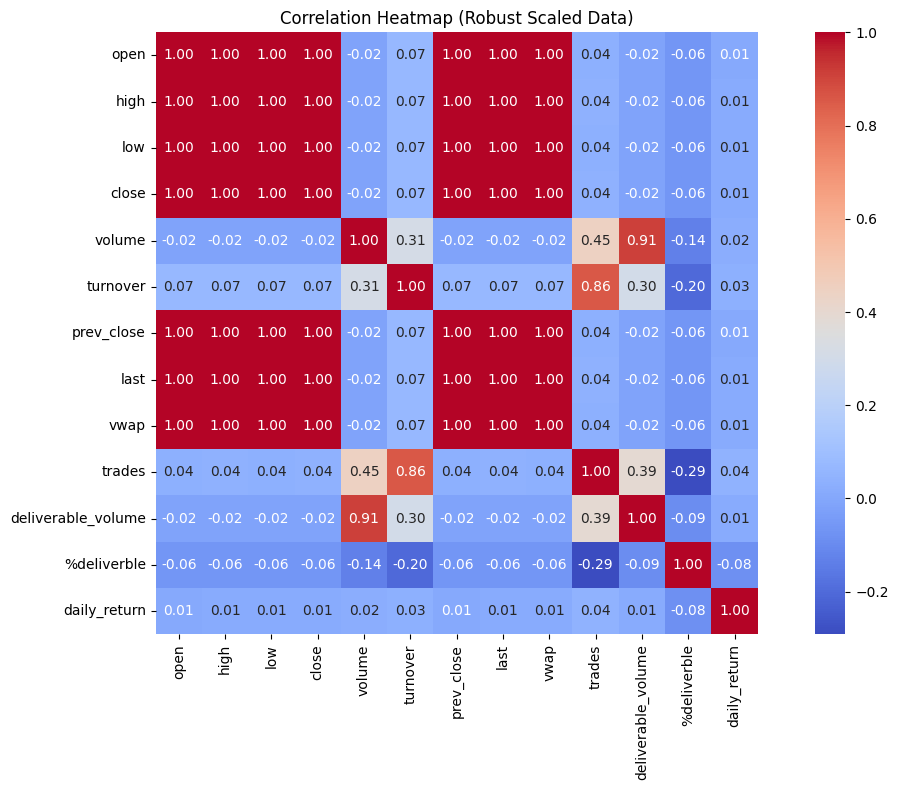

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the robust-scaled dataset
df = pd.read_csv(r"c:\Users\user\Desktop\Economy & Finance project\nse_robust_final.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Robust Scaled Data)")
plt.tight_layout()
plt.show()

In [24]:
# Convert date to datetime with correct format
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')


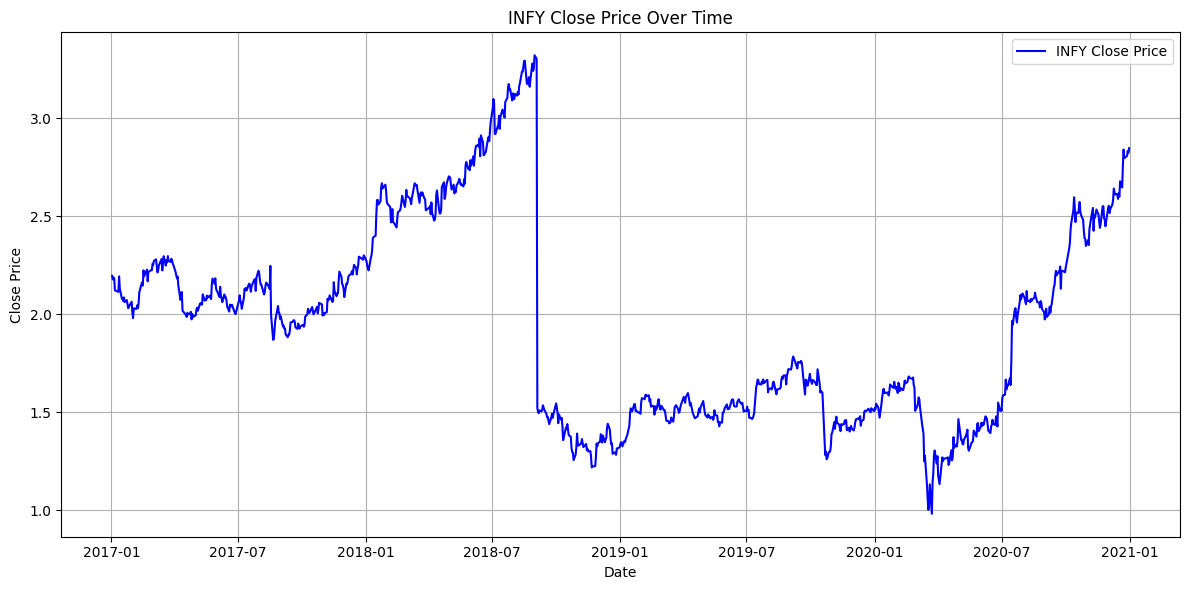

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the robust scaled dataset
df = pd.read_csv(r"c:\Users\user\Desktop\Economy & Finance project\nse_robust_final.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Filter for one stock, e.g., INFY
df = df[df['symbol'] == 'INFY'].copy()

# Convert date to datetime with day-first format
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')


# Plot Close price over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='INFY Close Price', color='blue')
plt.title("INFY Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the robust scaled CSV
df_scaled = pd.read_csv(r"c:\Users\user\Desktop\Economy & Finance project\nse_robust_final.csv")

# Step 2: Convert 'date' to datetime
df_scaled['date'] = pd.to_datetime(df_scaled['date'], dayfirst=True)

# Step 3: Choose companies to plot
symbols_to_plot = ['INFY', 'TCS', 'RELIANCE', 'HDFCBANK']  # Add more if needed

# Step 4: Plot Close price over time for each symbol
plt.figure(figsize=(14, 7))

for symbol in symbols_to_plot:
    df_symbol = df_scaled[df_scaled['symbol'] == symbol]
    plt.plot(df_symbol['date'], df_symbol['close'], label=symbol)

# Step 5: Add dynamic title and labels
start_date = df_scaled['date'].min().strftime('%b %Y')
end_date = df_scaled['date'].max().strftime('%b %Y')
plt.title(f"Robust Scaled Close Price Comparison: {', '.join(symbols_to_plot)} ({start_date} – {end_date})")
plt.xlabel("Date")
plt.ylabel("Robust Scaled Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "3", at position 9. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.